Installing packages

In [ ]:
!apt install -qq libspatialindex-dev
!pip install --quiet fiona shapely pyproj rtree
!pip install --quiet geopandas
!pip install opendatasets
!pip install mapclassify

libspatialindex-dev is already the newest version (1.9.3-1build1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing libraries & datasets

In [ ]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as po
import plotly.graph_objs as pg
import opendatasets as od
import geopandas as gpd
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022")

Skipping, found downloaded files in "./global-fossil-co2-emissions-by-country-2002-2022" (use force=True to force download)


Data cleaning

In [ ]:
df = pd.read_csv('/content/global-fossil-co2-emissions-by-country-2002-2022/GCB2022v27_MtCO2_flat.csv')

df.head()

df.tail()

Country ISO 3166-1 alpha-3  Year         Total          Coal  \
63099  Global                WLD  2017  36096.739276  14506.973805   
63100  Global                WLD  2018  36826.506600  14746.830688   
63101  Global                WLD  2019  37082.558969  14725.978025   
63102  Global                WLD  2020  35264.085734  14174.564010   
63103  Global                WLD  2021  37123.850352  14979.598083   

                Oil          Gas       Cement     Flaring       Other  \
63099  12242.627935  7144.928128  1507.923185  391.992176  302.294047   
63100  12266.016285  7529.846784  1569.218392  412.115746  302.478706   
63101  12345.653374  7647.528220  1617.506786  439.253991  306.638573   
63102  11191.808551  7556.290283  1637.537532  407.583673  296.301685   
63103  11837.159116  7921.829472  1672.592372  416.525563  296.145746   

       Per Capita  
63099    4.749682  
63100    4.792753  
63101    4.775633  
63102    4.497423  
63103    4.693699

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [ ]:
df.describe()

Year         Total          Coal           Oil           Gas  \
count  63104.000000  62904.000000  21744.000000  21717.000000  21618.000000   
mean    1885.500000     55.224788     73.968916     55.760624     23.504285   
std       78.519728    824.845435    598.986992    519.034563    247.674772   
min     1750.000000      0.000000      0.000000      0.000000      0.000000   
25%     1817.750000      0.000000      0.000000      0.091600      0.000000   
50%     1885.500000      0.000000      0.271852      1.044240      0.000000   
75%     1953.250000      0.549342      6.736411      8.339752      0.581628   
max     2021.000000  37123.850352  15051.512770  12345.653374   7921.829472   

             Cement       Flaring        Other    Per Capita  
count  20814.000000  21550.000000  1620.000000  18974.000000  
mean       4.330443      1.712695    10.951389      4.413363  
std       50.305770     16.727067    39.034073     17.432815  
min        0.000000      0.000000     0.000000      0.000000  
25%        0.000000      0.000000     0.520885      0.197866  
50%        0.022756      0.000000     1.255329      1.303949  
75%        0.568502      0.000000     4.385471      5.077994  
max     1672.592372    439.253991   306.638573    834.192642

In [ ]:
df = df.fillna(0)

In [ ]:
#checking total duplicate rows
duplicate_check = df.duplicated(keep=False).sum()
print(duplicate_check)

0


In [ ]:
# Mengecek komponen-komponen dataset
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

Rows and Columns:
(62832, 11)

Column Names:
Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

Null Values %:
Country               0.0
ISO 3166-1 alpha-3    0.0
Year                  0.0
Total                 0.0
Coal                  0.0
Oil                   0.0
Gas                   0.0
Cement                0.0
Flaring               0.0
Other                 0.0
Per Capita            0.0
dtype: float64


In [ ]:
# Identifikasi feature berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")

2 Categorical features:
['Country', 'ISO 3166-1 alpha-3']

8 float64 features:
['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita']

1 int features:
['Year']

8 numpy.number features::
['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita']


In [ ]:
# Pivoting data Country dengan ISO 3166-1 alpha-3
pd.crosstab(df['Country'], df['ISO 3166-1 alpha-3'], margins = True, margins_name = "Total")

ISO 3166-1 alpha-3            0  ABW  AFG  AGO  AIA  ALB  AND  ARE  ARG  ARM  \
Country                                                                        
Afghanistan                   0    0  272    0    0    0    0    0    0    0   
Albania                       0    0    0    0    0  272    0    0    0    0   
Algeria                       0    0    0    0    0    0    0    0    0    0   
Andorra                       0    0    0    0    0    0  272    0    0    0   
Angola                        0    0    0  272    0    0    0    0    0    0   
...                         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Wallis and Futuna Islands     0    0    0    0    0    0    0    0    0    0   
Yemen                         0    0    0    0    0    0    0    0    0    0   
Zambia                        0    0    0    0    0    0    0    0    0    0   
Zimbabwe                      0    0    0    0    0    0    0    0    0    0   
Total                      1632  272  272  272  272  272  272  272  272  272   

ISO 3166-1 alpha-3         ...  VNM  VUT  WLF  WSM  XIT  YEM  ZAF  ZMB  ZWE  \
Country                    ...                                                
Afghanistan                ...    0    0    0    0    0    0    0    0    0   
Albania                    ...    0    0    0    0    0    0    0    0    0   
Algeria                    ...    0    0    0    0    0    0    0    0    0   
Andorra                    ...    0    0    0    0    0    0    0    0    0   
Angola                     ...    0    0    0    0    0    0    0    0    0   
...                        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Wallis and Futuna Islands  ...    0    0  272    0    0    0    0    0    0   
Yemen                      ...    0    0    0    0    0  272    0    0    0   
Zambia                     ...    0    0    0    0    0    0    0  272    0   
Zimbabwe                   ...    0    0    0    0    0    0    0    0  272   
Total                      ...  272  272  272  272  272  272  272  272  272   

ISO 3166-1 alpha-3         Total  
Country                           
Afghanistan                  272  
Albania                      272  
Algeria                      272  
Andorra                      272  
Angola                       272  
...                          ...  
Wallis and Futuna Islands    272  
Yemen                        272  
Zambia                       272  
Zimbabwe                     272  
Total                      62832  

[232 rows x 226 columns]

In [ ]:
#checking years available
df['Year'].unique()

array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

In [ ]:
#checking countries in the datasets
len(df['Country'].unique())

232

In [ ]:
# check how many columns contains null values
df.isnull().sum().sort_values()

Country               0
ISO 3166-1 alpha-3    0
Year                  0
Total                 0
Coal                  0
Oil                   0
Gas                   0
Cement                0
Flaring               0
Other                 0
Per Capita            0
dtype: int64

Observasi: 
1.   Total 63104 baris dan 11 kolom
2.   Dari 11 kolom, terdapat 9 kolom yang memiliki *null values*



In [ ]:
# Check uniqueness
df[df['ISO 3166-1 alpha-3'].isna()==True]

Empty DataFrame
Columns: [Country, ISO 3166-1 alpha-3, Year, Total, Coal, Oil, Gas, Cement, Flaring, Other, Per Capita]
Index: []

In [ ]:
countries = list(df[df['ISO 3166-1 alpha-3'].isna()==True]['Country'].unique())

In [ ]:
len(countries)

0

In [ ]:
# we drop the six countries simply
df = df[~df['Country'].isin(countries)]
df.head()

Country ISO 3166-1 alpha-3  Year  Total  Coal  Oil  Gas  Cement  \
0  Afghanistan                AFG  1750    0.0   0.0  0.0  0.0     0.0   
1  Afghanistan                AFG  1751    0.0   0.0  0.0  0.0     0.0   
2  Afghanistan                AFG  1752    0.0   0.0  0.0  0.0     0.0   
3  Afghanistan                AFG  1753    0.0   0.0  0.0  0.0     0.0   
4  Afghanistan                AFG  1754    0.0   0.0  0.0  0.0     0.0   

   Flaring  Other  Per Capita  
0      0.0    0.0         0.0  
1      0.0    0.0         0.0  
2      0.0    0.0         0.0  
3      0.0    0.0         0.0  
4      0.0    0.0         0.0

In [ ]:
len(df['Country'].unique())

232

we can assume that if a country doesn't have any emissions then that to be zero (all the numerical columns)

In [ ]:
df.fillna(0, inplace = True)

In [ ]:
 # This is list of wiki_iso_code  is copied from wikipedia https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3 to check wheather all the country of the world are in data or not
wiki_iso_code = ['ABW','AFG','AGO','AIA','ALA','ALB','AND','ARE','ARG','ARM','ASM','ATA','ATF',
'ATG','AUS','AUT','AZE','BDI','BEL','BEN','BES','BFA','BGD','BGR','BHR','BHS',
'BIH','BLM','BLR','BLZ','BMU','BOL','BRA','BRB','BRN','BTN','BVT','BWA','CAF',
'CAN','CCK','CHE','CHL','CHN','CIV','CMR','COD','COG','COK','COL','COM','CPV',
'CRI','CUB','CUW','CXR','CYM','CYP','CZE','DEU','DJI','DMA','DNK','DOM','DZA',
'ECU','EGY','ERI','ESH','ESP','EST','ETH','FIN','FJI','FLK','FRA','FRO','FSM',
'GAB','GBR','GEO','GGY','GHA','GIB','GIN','GLP','GMB','GNB','GNQ','GRC','GRD',
'GRL','GTM','GUF','GUM','GUY','HKG','HMD','HND','HRV','HTI','HUN','IDN','IMN',
'IND','IOT','IRL','IRN','IRQ','ISL','ISR','ITA','JAM','JEY','JOR','JPN','KAZ',
'KEN','KGZ','KHM','KIR','KNA','KOR','KWT','LAO','LBN','LBR','LBY','LCA','LIE',
'LKA','LSO','LTU','LUX','LVA','MAC','MAF','MAR','MCO','MDA','MDG','MDV','MEX',
'MHL','MKD','MLI','MLT','MMR','MNE','MNG','MNP','MOZ','MRT','MSR','MTQ','MUS',
'MWI','MYS','MYT','NAM','NCL','NER','NFK','NGA','NIC','NIU','NLD','NOR','NPL',
'NRU','NZL','OMN','PAK','PAN','PCN','PER','PHL','PLW','PNG','POL','PRI','PRK',
'PRT','PRY','PSE','PYF','QAT','REU','ROU','RUS','RWA','SAU','SDN','SEN','SGP',
'SGS','SHN','SJM','SLB','SLE','SLV','SMR','SOM','SPM','SRB','SSD','STP','SUR',
'SVK','SVN','SWE','SWZ','SXM','SYC','SYR','TCA','TCD','TGO','THA','TJK','TKL',
'TKM','TLS','TON','TTO','TUN','TUR','TUV','TWN','TZA','UGA','UKR','UMI','URY',
'USA','UZB','VAT','VCT','VEN','VGB','VIR','VNM','VUT','WLF','WSM','YEM','ZAF',
'ZMB','ZWE']

In [ ]:
len(set(wiki_iso_code))

249

In [ ]:
dataset_iso_code = df['ISO 3166-1 alpha-3'].unique()
print(len(dataset_iso_code))

226


In [ ]:
remaining_code = [code for code in wiki_iso_code if code not in dataset_iso_code]
print(remaining_code)

['ALA', 'ASM', 'ATF', 'BLM', 'BVT', 'CCK', 'CYM', 'ESH', 'FLK', 'GGY', 'GIB', 'GUM', 'HMD', 'IMN', 'IOT', 'JEY', 'MAF', 'MCO', 'MNP', 'NFK', 'PCN', 'SGS', 'SJM', 'SMR', 'TKL', 'UMI', 'VAT', 'VIR']


In [ ]:
len(remaining_code)

28

In [ ]:
total_code = set(remaining_code).union(set(dataset_iso_code))

In [ ]:
extra_code = [code for code in dataset_iso_code if code not in wiki_iso_code]
print(extra_code)

['PCZ', 0, 'KSV', 'XIT', 'WLD']


In [ ]:
df[df['ISO 3166-1 alpha-3'].isin(extra_code)].groupby(['ISO 3166-1 alpha-3','Country']).sum()

Year         Total  \
ISO 3166-1 alpha-3 Country                                          
0                  French Equatorial Africa  512856  2.660064e+00   
                   French West Africa        512856  9.764956e+00   
                   Kuwaiti Oil Fires         512856  4.779248e+02   
                   Leeward Islands           512856  1.795360e-01   
                   Pacific Islands (Palau)   512856  4.429776e+00   
                   Ryukyu Islands            512856  2.089277e+01   
KSV                Kosovo                    512856  1.113061e+02   
PCZ                Panama Canal Zone         512856  1.476226e+01   
WLD                Global                    512856  1.736930e+06   
XIT                International Transport   512856  4.306267e+04   

                                                      Coal            Oil  \
ISO 3166-1 alpha-3 Country                                                  
0                  French Equatorial Africa       0.073382       2.586682   
                   French West Africa             1.567948       7.797432   
                   Kuwaiti Oil Fires              0.000000     451.104352   
                   Leeward Islands                0.035070       0.144466   
                   Pacific Islands (Palau)        0.000000       4.429776   
                   Ryukyu Islands                 0.058606      20.016842   
KSV                Kosovo                        81.700028      26.125623   
PCZ                Panama Canal Zone              0.000000      14.711150   
WLD                Global                    804190.053522  605476.736614   
XIT                International Transport        0.000000   43062.671846   

                                                       Gas        Cement  \
ISO 3166-1 alpha-3 Country                                                 
0                  French Equatorial Africa       0.000000      0.000000   
                   French West Africa             0.000000      0.399577   
                   Kuwaiti Oil Fires              0.000000      0.000000   
                   Leeward Islands                0.000000      0.000000   
                   Pacific Islands (Palau)        0.000000      0.000000   
                   Ryukyu Islands                 0.000000      0.817327   
KSV                Kosovo                         0.000000      3.480453   
PCZ                Panama Canal Zone              0.051106      0.000000   
WLD                Global                    254057.821146  45066.925255   
XIT                International Transport        0.000000      0.000000   

                                                  Flaring        Other  \
ISO 3166-1 alpha-3 Country                                               
0                  French Equatorial Africa      0.000000     0.000000   
                   French West Africa            0.000000     0.000000   
                   Kuwaiti Oil Fires            26.820480     0.000000   
                   Leeward Islands               0.000000     0.000000   
                   Pacific Islands (Palau)       0.000000     0.000000   
                   Ryukyu Islands                0.000000     0.000000   
KSV                Kosovo                        0.000000     0.000000   
PCZ                Panama Canal Zone             0.000000     0.000000   
WLD                Global                    18454.285582  8057.042204   
XIT                International Transport       0.000000     0.000000   

                                             Per Capita  
ISO 3166-1 alpha-3 Country                               
0                  French Equatorial Africa    0.471842  
                   French West Africa          0.406859  
                   Kuwaiti Oil Fires           0.000000  
                   Leeward Islands             1.504641  
                   Pacific Islands (Palau)    77.621548  
                   Ryukyu Islands              0.000000  
KSV                Kosovo  

Observasi: 
1. It is Clear that 28 ISO codes are not listed in this dataset.
2. Out of those 28 ISO 31661-1 alpha-3  KSV, PCZ, WLD, XIT are not comes even ISO 3166-1 alpha 3.
3. Accoding to ISO 3166-3 PCZ changed to PZPA that is mearged with panama.
4. Kosovo is a country but no ISO code is assigned to it.
5.Global and Internation Transport are not countries they are total

In [ ]:
## There are some rows for entire world data whoe and international transport lets seperate that out
world_data = df[df['ISO 3166-1 alpha-3']=='WLD']

In [ ]:
df = df[df['Country']!='Global']
df

Country ISO 3166-1 alpha-3  Year        Total  Coal  \
0                  Afghanistan                AFG  1750     0.000000   0.0   
1                  Afghanistan                AFG  1751     0.000000   0.0   
2                  Afghanistan                AFG  1752     0.000000   0.0   
3                  Afghanistan                AFG  1753     0.000000   0.0   
4                  Afghanistan                AFG  1754     0.000000   0.0   
...                        ...                ...   ...          ...   ...   
62827  International Transport                XIT  2017  1230.506945   0.0   
62828  International Transport                XIT  2018  1270.690768   0.0   
62829  International Transport                XIT  2019  1249.558280   0.0   
62830  International Transport                XIT  2020   938.508679   0.0   
62831  International Transport                XIT  2021  1021.749204   0.0   

               Oil  Gas  Cement  Flaring  Other  Per Capita  
0         0.000000  0.0     0.0      0.0    0.0         0.0  
1         0.000000  0.0     0.0      0.0    0.0         0.0  
2         0.000000  0.0     0.0      0.0    0.0         0.0  
3         0.000000  0.0     0.0      0.0    0.0         0.0  
4         0.000000  0.0     0.0      0.0    0.0         0.0  
...            ...  ...     ...      ...    ...         ...  
62827  1230.506945  0.0     0.0      0.0    0.0         0.0  
62828  1270.690768  0.0     0.0      0.0    0.0         0.0  
62829  1249.558280  0.0     0.0      0.0    0.0         0.0  
62830   938.508679  0.0     0.0      0.0    0.0         0.0  
62831  1021.749204  0.0     0.0      0.0    0.0         0.0  

[62832 rows x 11 columns]

In [ ]:
transport_data = df[df["Country"]=='International Transport']
transport_data

Country ISO 3166-1 alpha-3  Year        Total  Coal  \
62560  International Transport                XIT  1750     0.000000   0.0   
62561  International Transport                XIT  1751     0.000000   0.0   
62562  International Transport                XIT  1752     0.000000   0.0   
62563  International Transport                XIT  1753     0.000000   0.0   
62564  International Transport                XIT  1754     0.000000   0.0   
...                        ...                ...   ...          ...   ...   
62827  International Transport                XIT  2017  1230.506945   0.0   
62828  International Transport                XIT  2018  1270.690768   0.0   
62829  International Transport                XIT  2019  1249.558280   0.0   
62830  International Transport                XIT  2020   938.508679   0.0   
62831  International Transport                XIT  2021  1021.749204   0.0   

               Oil  Gas  Cement  Flaring  Other  Per Capita  
62560     0.000000  0.0     0.0      0.0    0.0         0.0  
62561     0.000000  0.0     0.0      0.0    0.0         0.0  
62562     0.000000  0.0     0.0      0.0    0.0         0.0  
62563     0.000000  0.0     0.0      0.0    0.0         0.0  
62564     0.000000  0.0     0.0      0.0    0.0         0.0  
...            ...  ...     ...      ...    ...         ...  
62827  1230.506945  0.0     0.0      0.0    0.0         0.0  
62828  1270.690768  0.0     0.0      0.0    0.0         0.0  
62829  1249.558280  0.0     0.0      0.0    0.0         0.0  
62830   938.508679  0.0     0.0      0.0    0.0         0.0  
62831  1021.749204  0.0     0.0      0.0    0.0         0.0  

[272 rows x 11 columns]

Visualisasi

In [ ]:
df.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [ ]:
#lets see the top 10 coutries in total emissions over the time

countries = list(df.groupby('Country').sum().sort_values(by='Total',ascending = False).index)
values = list(df.groupby('Country').sum().sort_values(by='Total', ascending = False)['Total'])

<AxesSubplot:title={'center':'Top 10 coutries in total emissions over the time'}>

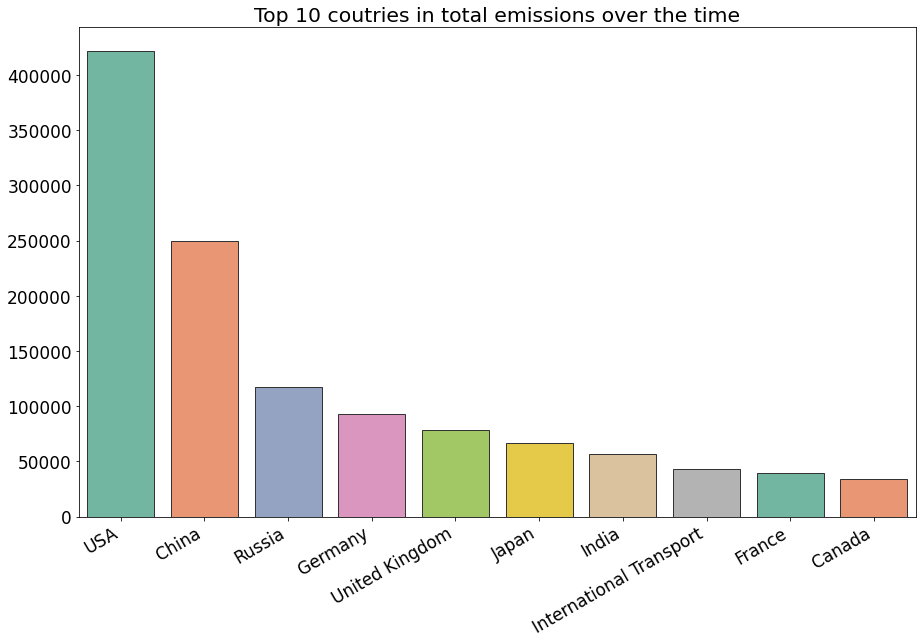

In [ ]:
## plot Bargraph
plt.figure(figsize = (15,9))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Top 10 coutries in total emissions over the time")
# sns.set_style('darkgrid')
sns.barplot(x=countries[:10], y=values[:10], palette ='Set2', edgecolor ='.2')

Text(0.5, 1.0, 'Top 10 countries based on CO2 emissions over the time')

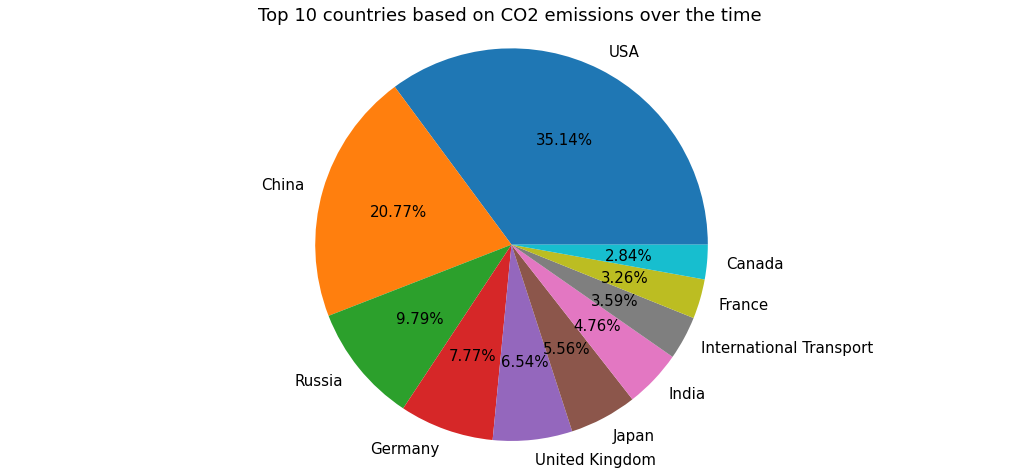

In [ ]:
plt.figure(figsize = (18,8))
plt.rcParams['font.size'] = 15.0
plt.pie(values[:10], labels = countries[:10], autopct='%1.2f%%')
plt.axis('equal')
plt.title('Top 10 countries based on CO2 emissions over the time')

Observasi: 
1. Over the time USA is in the top of co2 emission

In [ ]:
#Lets consider Indonesia for a small study over the trend of emissions
indonesia_data = df[df['Country']=='Indonesia']

In [ ]:
##Lets see the trend of emissions of Indonesia over the past 10 years
indonesia_past_10 = indonesia_data[-10:]

Text(0.5, 1.0, 'Trend of emission in Indonesia over last 10 years')

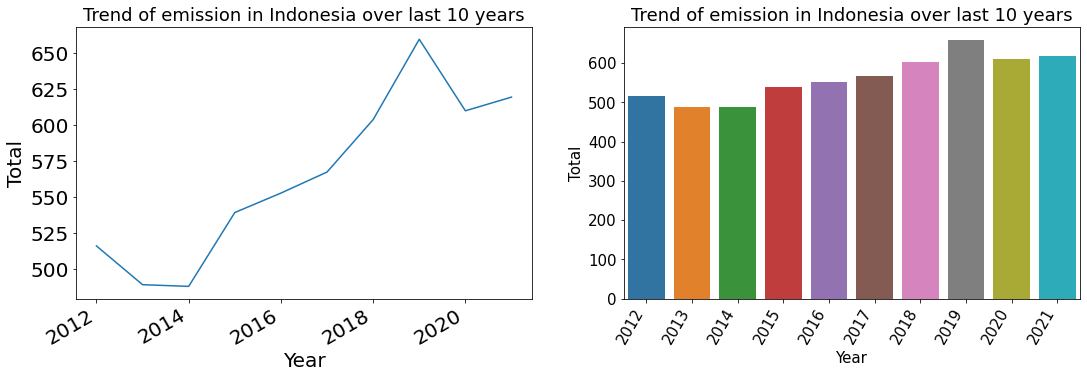

In [ ]:
plt.figure(figsize = (18,5))
# Plot 1
plt.subplot(1,2,1)
sns.lineplot(x = 'Year', y = 'Total', data = indonesia_past_10)
plt.rcParams['font.size'] = 15
plt.xticks(rotation = 30, ha = 'right')
plt.title("Trend of emission in Indonesia over last 10 years")

# plot 2
plt.subplot(1,2,2)
sns.barplot(x='Year', y='Total', data = indonesia_past_10)
plt.xticks(rotation = 60, ha = 'right')
plt.title("Trend of emission in Indonesia over last 10 years")

The dip in 2020 might be due to COVID19 and lockdowns all around but the trend has been clearly increasing all over years

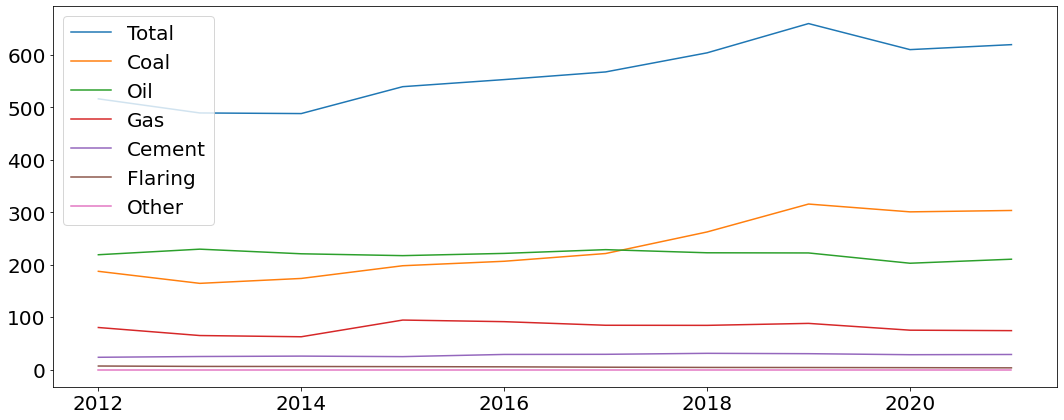

In [ ]:
#Trend of all types of emissions over last 10 years
columns = ['Coal', 'Oil', 'Gas','Cement', 'Flaring', 'Other']
plt.figure(figsize = (18,7))
plt.plot('Year', 'Total', data = indonesia_past_10)
plt.plot('Year','Coal',data = indonesia_past_10)
plt.plot('Year','Oil', data =indonesia_past_10 )
plt.plot('Year','Gas', data =indonesia_past_10 )
plt.plot('Year','Cement', data =indonesia_past_10 )
plt.plot('Year','Flaring', data =indonesia_past_10 )
plt.plot('Year','Other', data =indonesia_past_10 )
plt.legend()

Conclusion
1. Over the last decade coal and oil are the main reason of emission

<AxesSubplot:>

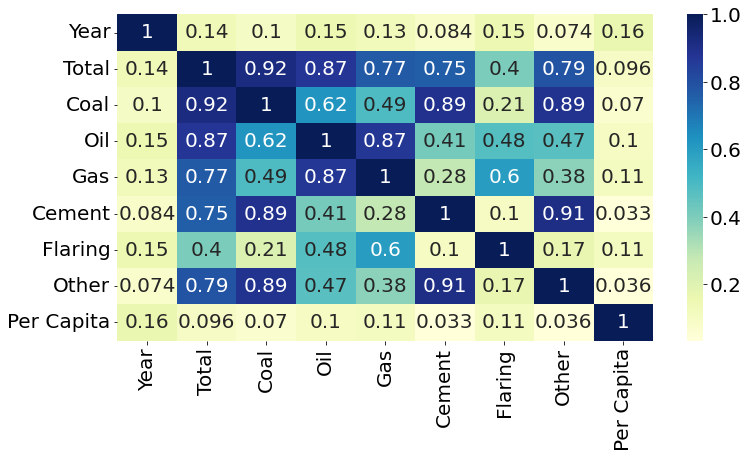

In [ ]:
# Correlation between the emission
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Year'),
  Text(0, 1.5, 'Total'),
  Text(0, 2.5, 'Coal'),
  Text(0, 3.5, 'Oil'),
  Text(0, 4.5, 'Gas'),
  Text(0, 5.5, 'Cement'),
  Text(0, 6.5, 'Flaring'),
  Text(0, 7.5, 'Other'),
  Text(0, 8.5, 'Per Capita')])

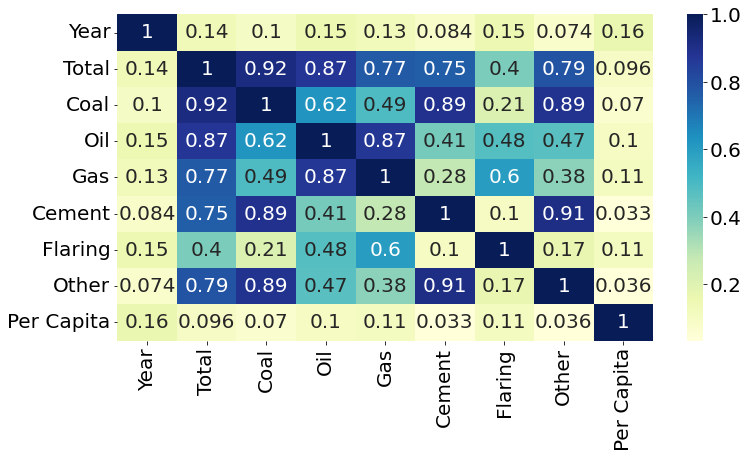

In [ ]:
# Correlation between the emission
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.yticks(rotation = '0')

In [ ]:
# During the last 10 years which emission gained higher amongst all
plt.figure(figsize=(12,5))
world_data_past_10 = world_data[-10:]
values_world = []
for i in columns:
    values_world.append(world_data_past_10.iloc[9][str(i)]-world_data_past_10.iloc[0][i])        
    print(world_data_past_10.iloc[9][i])
    print(world_data_past_10.iloc[0][i])
    print(world_data_past_10.iloc[9][i]-world_data_past_10.iloc[0]['Coal'])

print(values_world)

14979.598083
14922.759403
56.83868000000075
11837.159116
11541.707139
-3085.6002869999993
7921.829472
6500.593776
-7000.929931
1672.592372
1384.570572
-13250.167031
416.525563
380.351189
-14506.23384
296.145746
276.285502
-14626.613657
[56.83868000000075, 295.4519770000006, 1421.2356960000006, 288.0218, 36.174374, 19.860243999999966]


<Figure size 864x360 with 0 Axes>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Coal'),
  Text(1, 0, 'Oil'),
  Text(2, 0, 'Gas'),
  Text(3, 0, 'Cement'),
  Text(4, 0, 'Flaring'),
  Text(5, 0, 'Other')])

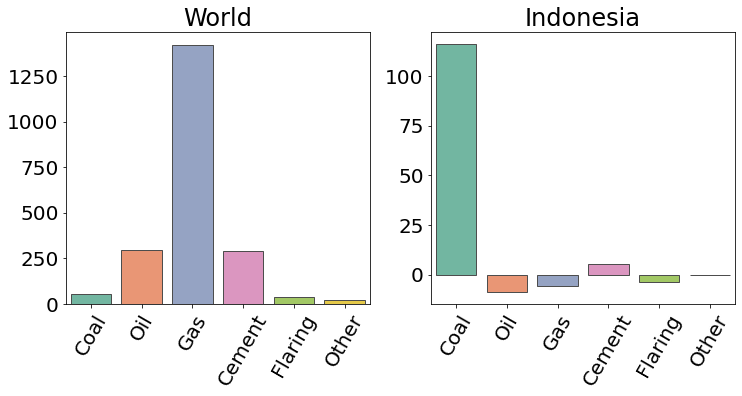

In [ ]:
# During the last 10 years which emission gained higher amongst all
plt.figure(figsize=(12,5))
world_data_past_10 = world_data[-10:]
values_world = []
for i in columns:
    values_world.append(world_data_past_10.iloc[9][str(i)]-world_data_past_10.iloc[0][i])        
values_india = []
for i in columns:
    values_india.append(indonesia_past_10.iloc[9][i]-indonesia_past_10.iloc[0][i])
plt.subplot(1,2,1)
sns.barplot(x=columns, y=values_world, palette = 'Set2', edgecolor = '0.3')
plt.title('World')
plt.xticks(rotation = '60')
plt.subplot(1,2,2)
sns.barplot(x=columns, y = values_india, palette = 'Set2', edgecolor ='.3')
plt.title('Indonesia')
plt.xticks(rotation = '60')

Conclusion: 

In last 10 years :-
1. Emissions due to gas are majority in world
2. In India Emissions due to Coal gained the most 

In [ ]:
# Analysis the data of AFG over past 30 years which has been continously affected by war
afg = df[df['ISO 3166-1 alpha-3']=='AFG']
afg_past_30 = afg[-30:]

<function matplotlib.pyplot.show(close=None, block=None)>

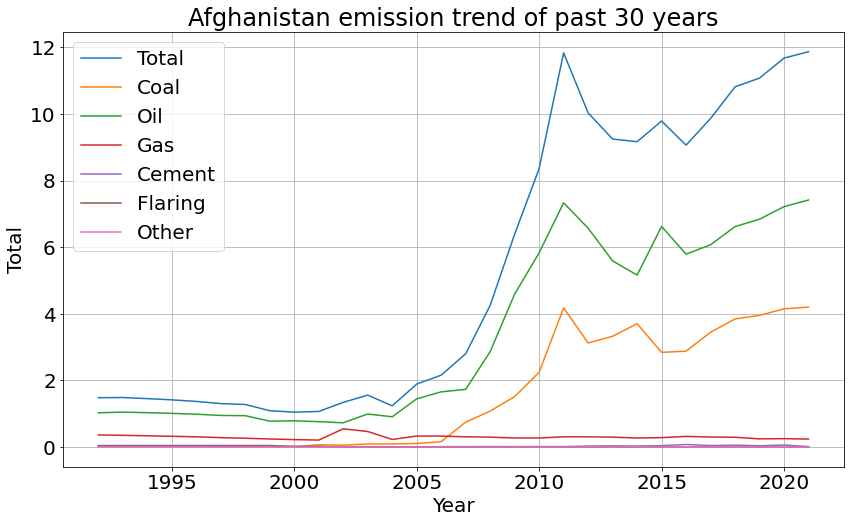

In [ ]:
cols = ['Total']+columns
plt.figure(figsize = (14,8))
sns.lineplot(x=afg_past_30['Year'], y=afg_past_30['Total'])
for i in columns:
    sns.lineplot(x=afg_past_30['Year'], y=afg_past_30[i])
plt.legend(cols)
plt.rcParams['font.size'] = 20
plt.title('Afghanistan emission trend of past 30 years')
plt.grid()
plt.show

Conclusion: 
1. The emission have been increased due to formation of more organized trade and goverment in later 2000s
2. Most of the emission are again from cola

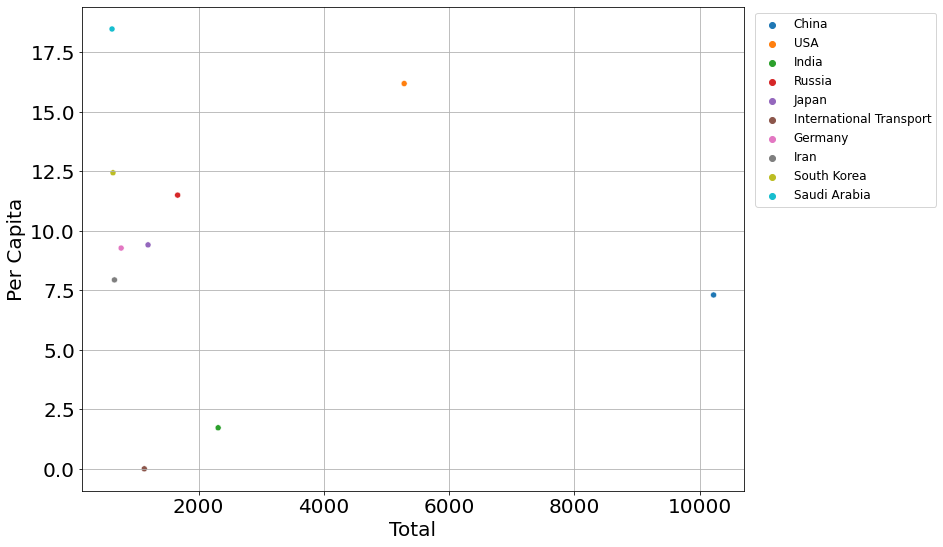

In [ ]:
plt.figure(figsize = (14,8))
data_past_10 = df[df['Year']>=2011]
avg_emission = data_past_10.groupby('Country').mean().sort_values(by='Total', ascending = False)[:10].reset_index()

sns.scatterplot(x='Total', y='Per Capita', data = avg_emission, hue = 'Country')
plt.legend(loc = ('upper right'),bbox_to_anchor = (1.3, 1),prop={'size': 12})
plt.tight_layout()
plt.grid()

Conclusion: 
Developing countries taking up the lower portion of plot and developed portions the upper

 Which countries have the highest average emission in each sectors over the past 10 years (top 5)

In [ ]:
for i in columns:
    print('\nSECTOR>>>>', str(i))
    avg_data = data_past_10.groupby('Country').mean().sort_values(by = str(i), ascending = False)[:10].reset_index()
    countries = avg_data['Country'][:5]
    for j in countries:
        print(j)


SECTOR>>>> Coal
China
India
USA
Japan
Russia

SECTOR>>>> Oil
USA
China
International Transport
India
Japan

SECTOR>>>> Gas
USA
Russia
China
Iran
Japan

SECTOR>>>> Cement
China
India
Viet Nam
USA
Turkey

SECTOR>>>> Flaring
USA
Russia
Iraq
Iran
Brazil

SECTOR>>>> Other
China
USA
Russia
South Korea
Japan


In [ ]:
# Geography Plots sector wise
avg_data = data_past_10.groupby('Country').mean().reset_index()

In [ ]:
countries = avg_data['Country'].values
ISO = []
for i in countries:
    ISO.append(data_past_10[data_past_10['Country']==str(i)]['ISO 3166-1 alpha-3'].unique()[0])

In [ ]:
cols.append('Per Capita')

In [ ]:
colors = ['magenta','gnbu','purp','turbo','ice','curl','oxy','haline']
for index,i in enumerate(cols):
    data = dict(type ='choropleth',
               colorscale = str(colors[index]),
               locations = ISO,
               z = avg_data[str(i)])
    if i!='Per Capita':
        layout = dict(title = str(i) + ' Emission by Country',
                      geo = dict(projection = {'type':'robinson'},
                                 showlakes = False)
                     )
    else:
        layout = dict(title = 'Per Capita by Country',
                       geo = dict(projection = {'type':'robinson'},
                                  showlakes = False)
                      )
    x = pg.Figure(data= [data], layout = layout)
    po.iplot(x)

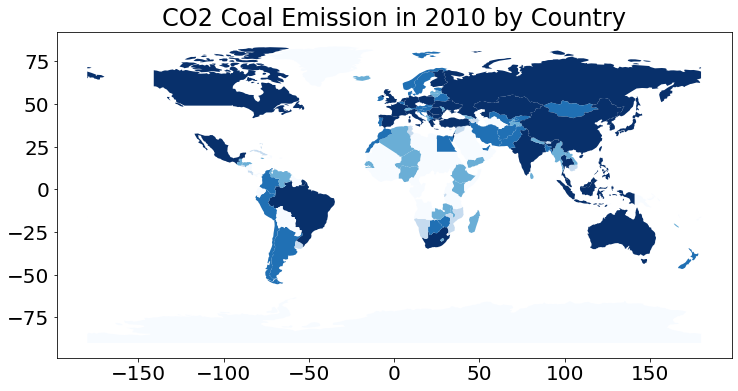

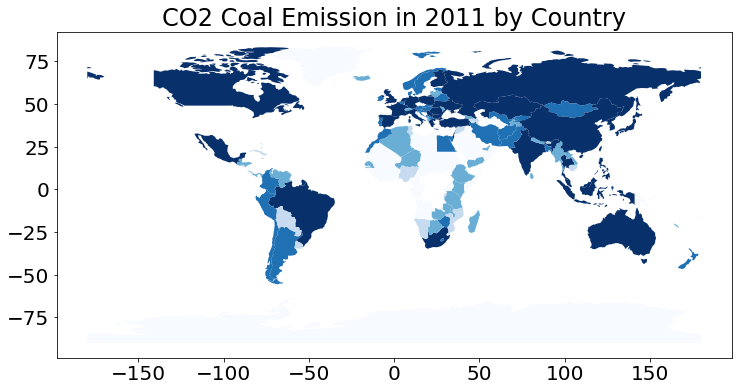

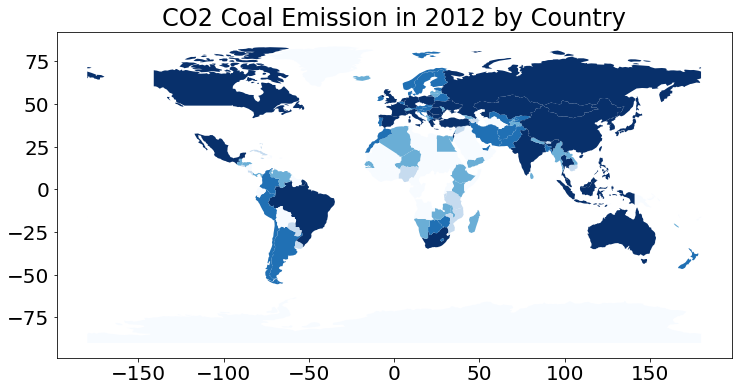

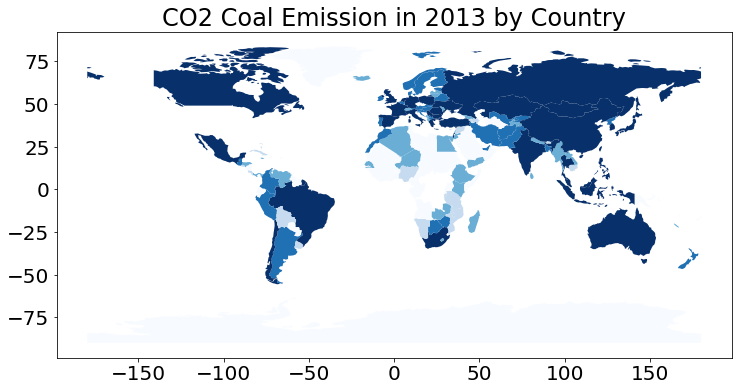

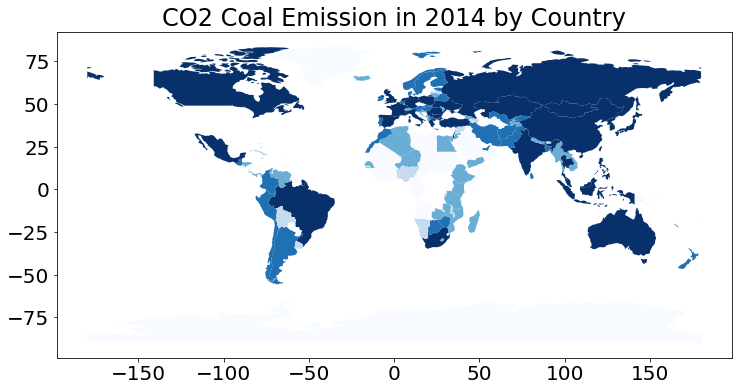

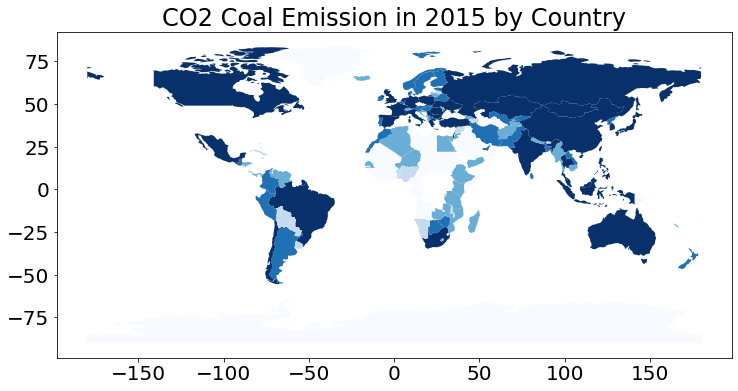

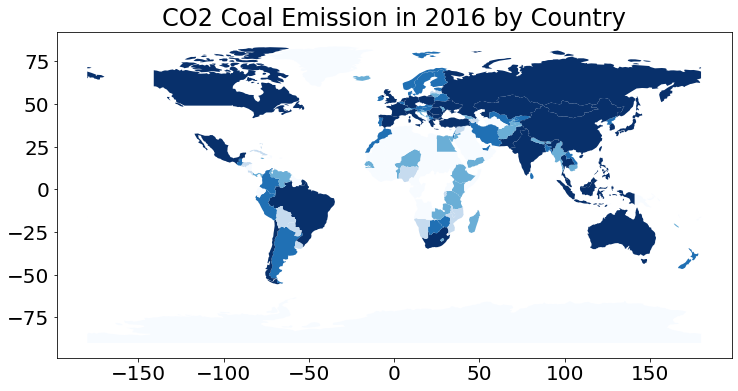

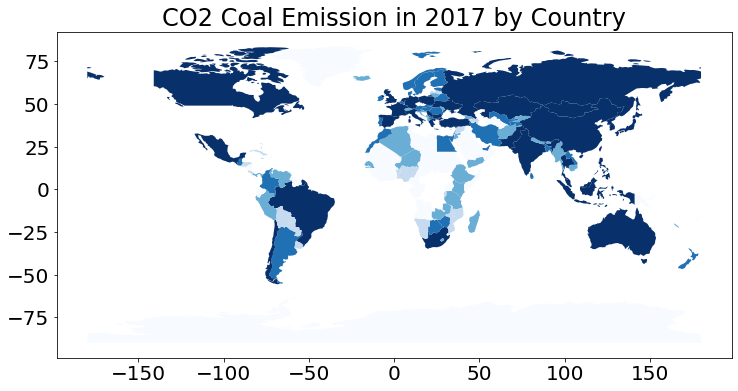

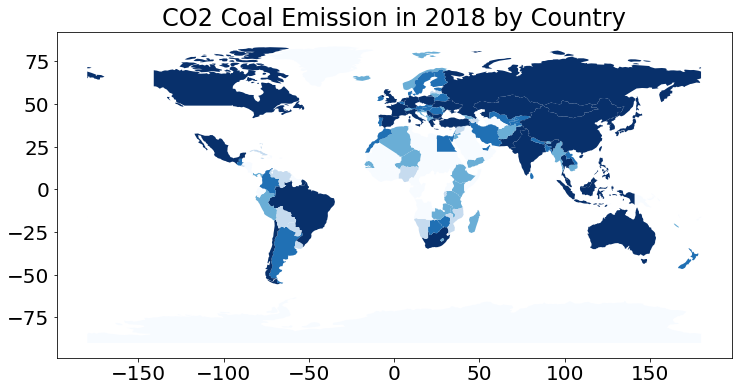

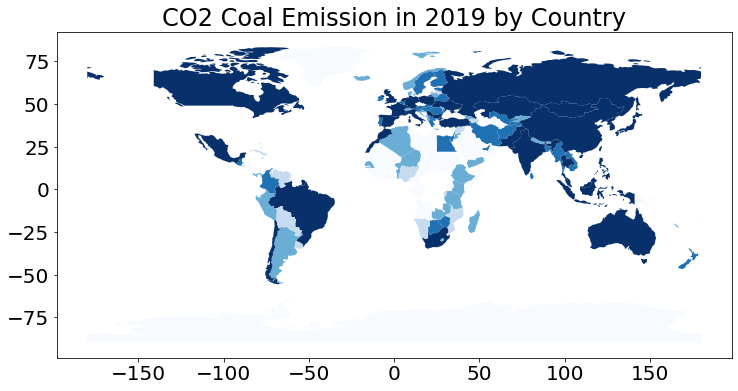

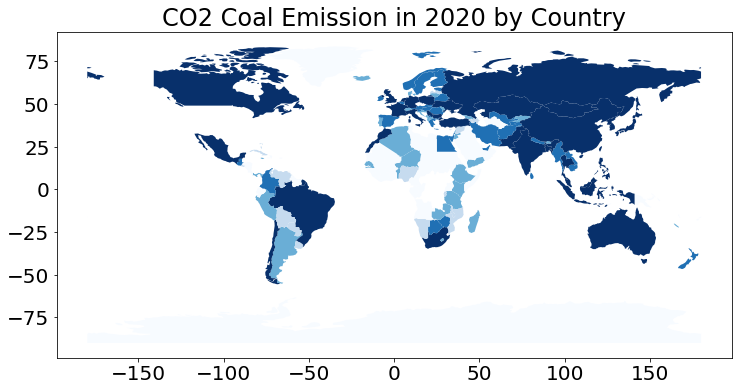

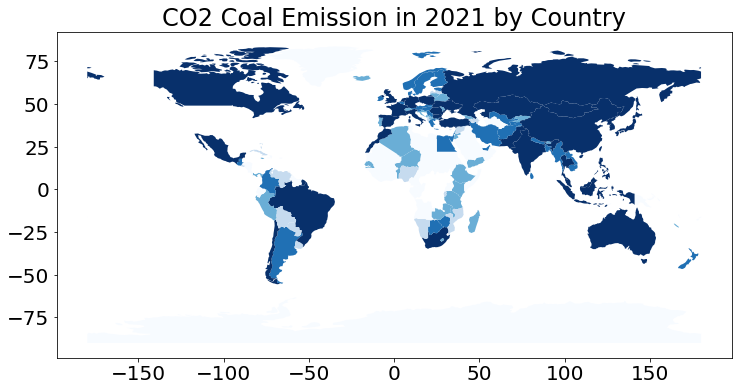

In [ ]:
import matplotlib.pyplot as plt

years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

for year in years:
    year_data = df[df["Year"] == year]
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    merged_data = world.merge(year_data, left_on="name", right_on="Country")

    merged_data.plot(column="Coal", cmap="Blues", figsize=(15, 6), scheme="quantiles")
    plt.title(f"CO2 Coal Emission in {year} by Country")
    plt.show()

In [ ]:
import plotly.express as px

In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(df, x= "Cement", y="Coal", z="Gas", color="Total", size="Per Capita", size_max=500,
                   hover_name="Country", animation_frame="Year", animation_group="Country",
                   height=600, log_x=True, log_y=True, log_z=True)

In [ ]:
# Show the plot
fig.show()